## For the Customer Support challenge followings are the objectives those are needed to be solved :
### Can we do topic clustering to find related topics? Can we improve campaigns run on this social media by this insights?
### Can we identify how many customers are unhappy and why are they unhappy about?
 

### For answering above two questions following steps were taken:
#### 1. Data Obtain and storing only tweets in a data frame.
#### 2. Choosing Single Author_id or Company for Analysis : For EG , APPLE or Amazon or UBER.
#### 3. Whole Method has been kept generic such that just after changing the company name we can have the required insights.
### Data Preprocessing:

1. Convert to lowercase.
2. Remove trailing spaces,stopwords,endline,punctuations.
3. For now,url has been removed but it can be used for further mining.
4. For now ,emoticons has been removed but they can be converted into text.
5. For now chinese language or other languages has been removed,but they can be translated.
6. Remove digits,numbers.
7. Tokenization and lemmatisation of the text for BOW.

### Sentiment Analysis :
1. Since our major focus was on negative tweets thus keeping only negative tweets makes sense.
2. Using NLTK vader library for finding sentiment score of the pre-processed data.
3. Choosing only those data points those have sentiment score(<0) i.e. negative tweets.

### Feature Extraction and Selection

1. To feed the text into model features need to get converted into vectors called vectorisation.
2. Chose Count vectoriser instead of Tf-idf vectorise since data is unsupervised and LDA is a probabilistic model that tries to estimate probability distributions for topics in documents and words in topics. The weighting of TF-IDF is not necessary for this.

### Topic Clustering:
1. For finding topics and words distribution inside the topics LDA works well.
2. LDA works well because it expresses competing sparsity between the topic distribution of documents and the word distribution of topics.

### Cluster Analysis.
1. Probablity of words for each topic has been plotted for each cluster(topics).
2. Word cloud gives us the clear picture of what happening in each cluster.


## Q-1: Can we do topic clustering to find related topics? Can we improve campaigns run on this social media by this insights?

### Yes we have done topic clustering to find topics related to negative tweets/ complaints from customers. 
#### 1. slow : cluster 1
#### 2. Device Error : cluster 2
#### 3. crash  : cluster 3 
#### 4. stuck : cluster 4
#### 5.   ios update : cluster 5
#### 6. bad experience : cluster 6
#### 7. Delay   and so-on
### Now, since it was an unlabelled data ,there was dire need of clustering and finding the pain-points. Above are the issues gathered for APPLEsupport . 
### For successfully running campaign we have to first find the users/target ,after that we can actually approach towards giving them full support,proper feedback and also follow up .This can helps us in boosting trust amongst and in result good marketing which makes good sales.

## Q-2 :Can we identify how many customers are unhappy and why are they unhappy about?
#### 1. Yes, it has been found out that 500/5000 i.e. incase of Apple Support if we take a sample of 5000 customers from population data we can see that 500 customers are unhappy which makes around 10% .Hence by finding out the sentiments of the customers from their tweets we can keep the count of customers having complaints.Similary ,process can be generalised and samples can be extrapolated for each product/companies .

#### 2. After topic clustering, it has been observed that most of the customers who are facing issue have their issue reported regarding device being crashed ,updates  and stuck .It has also been visualised using WORDCLOUD.
#### 3. Similary for each company , process can be generalised for finding out from negative sentiments/tweets what actually are the reasons which customers are unhappy about.



In [ ]:
# Import important libraries.
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.simplefilter('ignore')
import lda


In [202]:
# Read and preview the data
df = pd.read_csv('twcs.csv')
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [203]:
df.shape  # we have around 2.8 million rows of data

(2811774, 7)

In [204]:
df.author_id.value_counts()

AmazonHelp      169840
AppleSupport    106860
Uber_Support     56270
SpotifyCares     43265
Delta            42253
                 ...  
284343               1
231274               1
641008               1
728664               1
368253               1
Name: author_id, Length: 702777, dtype: int64

#### We can observe that there are 2 million customer support tickets with @[company name] which are called handles and also #company name.
#### There are tickets of about  7 lakh companies present inside the data set .


In [205]:
df.author_id.value_counts().index[0]

'AmazonHelp'

In [206]:
companyName ='AppleSupport'

### Data Preprocessing

In [207]:
df = df[df['author_id']==companyName ]
df = df.sample(5000)
#support tickets of multiple company like Amazon,Apple Uber etc.There are about 7 lakh companies customer support tickets present. 

In [208]:
df['text']

806148     @333383 Great job going through those steps. T...
1164055    @420721 Does the music play from the Music app...
628309     @288350 We have received your DM. We will work...
2160055    @672816 Having a reliable iPhone is important!...
1617271    @532499 Here’s what you can do to work around ...
                                 ...                        
899634     @356595 We're happy to help out. We've receive...
1676936    @126462 Thanks for bringing this to our attent...
1875153    @600617 Thanks for reaching out. Can you tell ...
894358     @355310 Go ahead and DM us your country to con...
1270086    @445645 The only other step we'd want to take ...
Name: text, Length: 5000, dtype: object

In [209]:
data = pd.DataFrame(df['text'])
data.head()

,text
806148,@333383 Great job going through those steps. T...
1164055,@420721 Does the music play from the Music app...
628309,@288350 We have received your DM. We will work...
2160055,@672816 Having a reliable iPhone is important!...
1617271,@532499 Here’s what you can do to work around ...


#### Now since we have obtained the data .
#### Next steps we have to clean/pre-process the data for there is too much noise in the data and data is unstructured .Thus, before feeding it to the model for classification we should transform the data.



In [210]:
# Checking for duplicacy of the text of tickets.
data[data.duplicated(subset=['text'],keep='first')==True]

,text


In [211]:
# Storing a copy of the data set
df_process = data.copy(deep=True)


#### Lowering the case of all the text

In [212]:
#lowering the case of all the text
df_process['text'] =df_process['text'].apply(lambda x: str(x).lower()) 
df_process.head()

,text
806148,@333383 great job going through those steps. t...
1164055,@420721 does the music play from the music app...
628309,@288350 we have received your dm. we will work...
2160055,@672816 having a reliable iphone is important!...
1617271,@532499 here’s what you can do to work around ...


#### Removing punctuations present inside the text .

In [213]:
# Remove punctuations
df_process['text']=df_process['text'].apply(lambda x: x.translate({ord(c):'' for c in "[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]"}))
df_process.head()

,text
806148,333383 great job going through those steps thi...
1164055,420721 does the music play from the music app ...
628309,288350 we have received your dm we will work w...
2160055,672816 having a reliable iphone is important l...
1617271,532499 heres what you can do to work around th...


#### Removing emoticons and chinese words and also stripping extra spaces,newline character.

In [214]:
df_process['text']=df_process['text'].apply(lambda x: x.strip())
import re
def remove_emoji(row):
    emoji = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U00002500-\U00002BEF"  # chinese char

                           "]+", flags=re.UNICODE)
    return emoji.sub(r'', row)
df_process['text']=df_process['text'].apply(remove_emoji)


#### Removing stopwords and frequent words from the text

In [215]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(row):
    row = row.split()
    row_new = " ".join([i for i in row if i not in stop_words])
    return row_new
def remove_freq_words(row):
    freq  = ['thanks','thnkx','thx','hey','hello','please','hi','hola','sorry','i','you','u','apologies']
    row = row.split()
    row_new = " ".join([i for i in row if i not in freq])
    return row_new

In [216]:
df_process['text']=df_process['text'].apply(remove_stopwords)
df_process['text']=df_process['text'].apply(remove_freq_words)


In [217]:
df_process.head()

,text
806148,333383 great job going steps time let's sign i...
1164055,420721 music play music app thirdparty app let...
628309,288350 received dm work httpstcogdrqu22ypt
2160055,672816 reliable iphone important let us help d...
1617271,532499 heres work around issue fixed future so...


####  Removing urls and numbers from customer support tickets

In [218]:
import re
def remove_urls(row):
    url_pattern = re.compile(r'http?://\S+|ww\.\S+|^\d+\s|\s\d+\s|\s\d+$')
    return url_pattern.sub(r'', row)


In [219]:
df_process['text']=df_process['text'].apply(remove_urls)


In [220]:
df_process.sample(5)

,text
1174980,help fix dm us version iosiphone well take htt...
1642466,let's follow dm we'll continue conversation ht...
1159389,deleting iphone delete mac longer access mac c...
2144405,help clarify referring ioscheck settings gt ge...
488239,"we've got covered tell us mean ""crashing"" free..."


#### Tokenizing the text 

In [221]:
from nltk.tokenize import word_tokenize 
df_process['text']=df_process['text'].apply(lambda x:word_tokenize(x))
df_process.head()

,text
806148,"[great, job, going, steps, time, let, 's, sign..."
1164055,"[music, play, music, app, thirdparty, app, let..."
628309,"[received, dm, work, httpstcogdrqu22ypt]"
2160055,"[reliable, iphone, important, let, us, help, d..."
1617271,"[heres, work, around, issue, fixed, future, so..."


#### Since we observed that tweets are from around the world and there are many words that are not present in english vocabulary .Thus there is a need of removing those from the data set before doing any kind of insights analysis.

In [222]:
# import enchant
# def check_english(row):
#     d = enchant.Dict("en_US")
#     new= []
#     new = [x for x in row if d.check(x)==True]
#     return new
    
# df_process['text']=df_process['text'].apply(check_english)
# df_process.head()

#### Lemmatizing the words for easier analysis.

In [223]:
lemmatizer = WordNetLemmatizer()
def lemmatize_root(row):
    new = []
    new = [lemmatizer.lemmatize(x) for x in row ] 
    return ' '.join(new)
df_process['text']=df_process['text'].apply(lemmatize_root)


In [224]:
df_process.sample(5)

,text
2352285,that 's type experience want go here 's helpfu...
1398993,want look issue join u dm httpstcogdrqu22ypt
1534625,here work around issue fixed future software u...
1625786,let 's get figured updated ioshttpstcoahjigcvf...
1862015,we 're help version operating system iphone ru...


### Sentiment Analysis 

#### Since our major focus is on negative customer support tweets we can have following apporaches for now :
#### 1. Segregating the whole tweets as per sentiments and taking only those with negative sentiments.
#### 2. Taking the tweets as per their sentiment score.
#### 3.  Analysing Negative reviews and considering them for insights.

#### Using NLTK vader we can actually score the tweets as per their sentiments.

In [225]:
sentiment_analyzer = SentimentIntensityAnalyzer()
def sentiment_score(row):
    return sentiment_analyzer.polarity_scores(row)['compound']



#### creating a new data set for analysis where there are only negative sentiments/complaints.

In [226]:
df_process['sentiment_score'] = df_process['text'].apply(sentiment_score)
df_negative = df_process[df_process['sentiment_score']<0.0]

In [227]:
df_negative.shape

(117, 2)

### Feature Extraction and Selection

In [228]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(df_negative['text'])
# print(vectorizer.get_feature_names())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_negative['text'])
print(vectorizer.get_feature_names())

In [230]:
X.shape

(117, 519)

### Topic Clustering

In [ ]:
import warnings
warnings.simplefilter('ignore')

# number of topics, e.g 5
# number of learning iterations, e.g 2000

lda_model = lda.LDA(
              n_topics=10, 
              n_iter=2000)
topics = lda_model.fit_transform(X) # X is document term matrix


# Print the topics found by the LDA model
n_top_words = 10
topic_summaries = []

topic_word = lda_model.topic_word_  # get the topic words
vocab = vectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print(f'Topic {i}: {" ".join(topic_words)}')

In [233]:
topic_summaries

['we like ll trouble working re what thing hear iphone',
 'app start music specific take crash noticing change store look',
 'let step know try worry still detail question reaching trouble',
 'error message update trying move getting longer time charge exact',
 'let issue device get know together work find updating missing',
 'apple using link contact may remove need vpn website team',
 'see check problem article call cable another report help attempt',
 'httpstcogdrqu22ypt dm let look device send continue affected together know',
 'version io iphone update also alarm one installed application work',
 'apps screen iphone tell stuck want restarting able answer got']

## Cluster Analysis

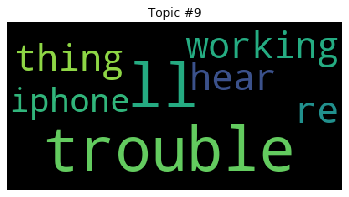

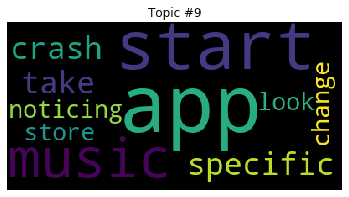

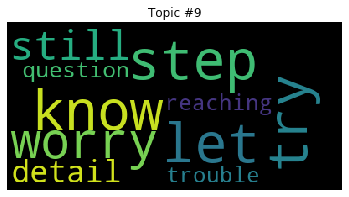

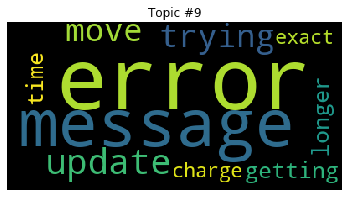

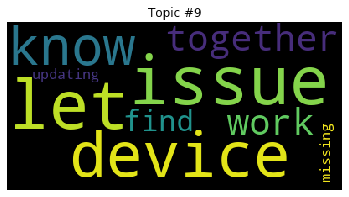

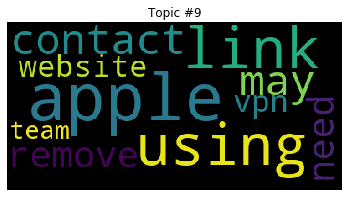

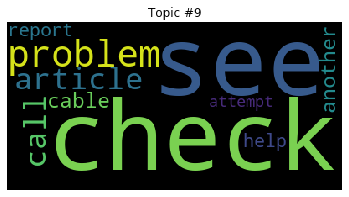

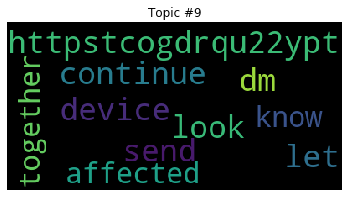

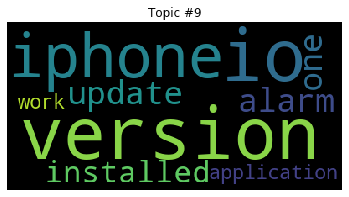

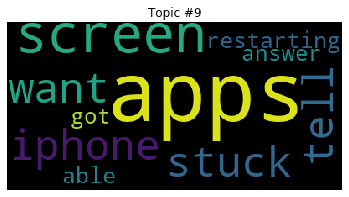

In [232]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(10):
    plt.figure()
    wordcloud = WordCloud().generate(topic_summaries[i])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

### Risks and Future Work

#### 1. More data processing can be done.
#### 2. Languages translation and emoticons conversion can be done.
#### 3. URLs can be visited and data mining can be done.
#### 4. More research towards entity relation can be done.
#### 5. Optimisation of model and topics by tuning hyperparameters can be done.
